#### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#### **Load the dataset**

In [2]:
iris = load_iris()

In [3]:
X = iris.data 
target = iris.target 
names = iris.target_names

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.shape

(150, 5)

#### **Data Visualization**

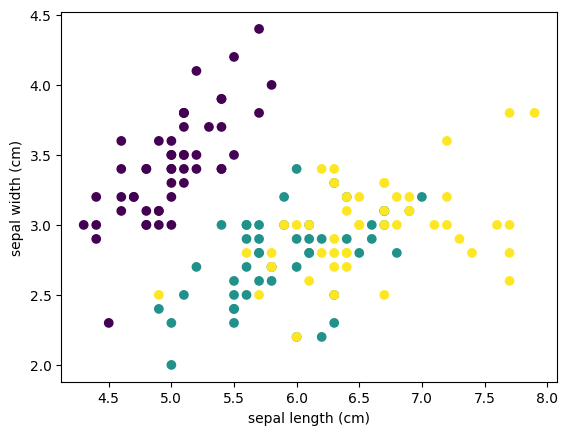

In [9]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.species)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

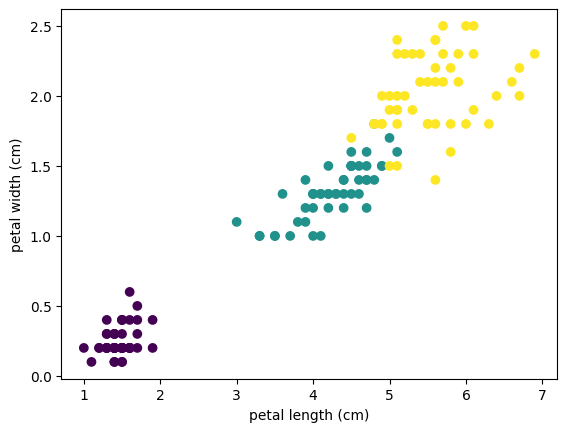

In [10]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df.species)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

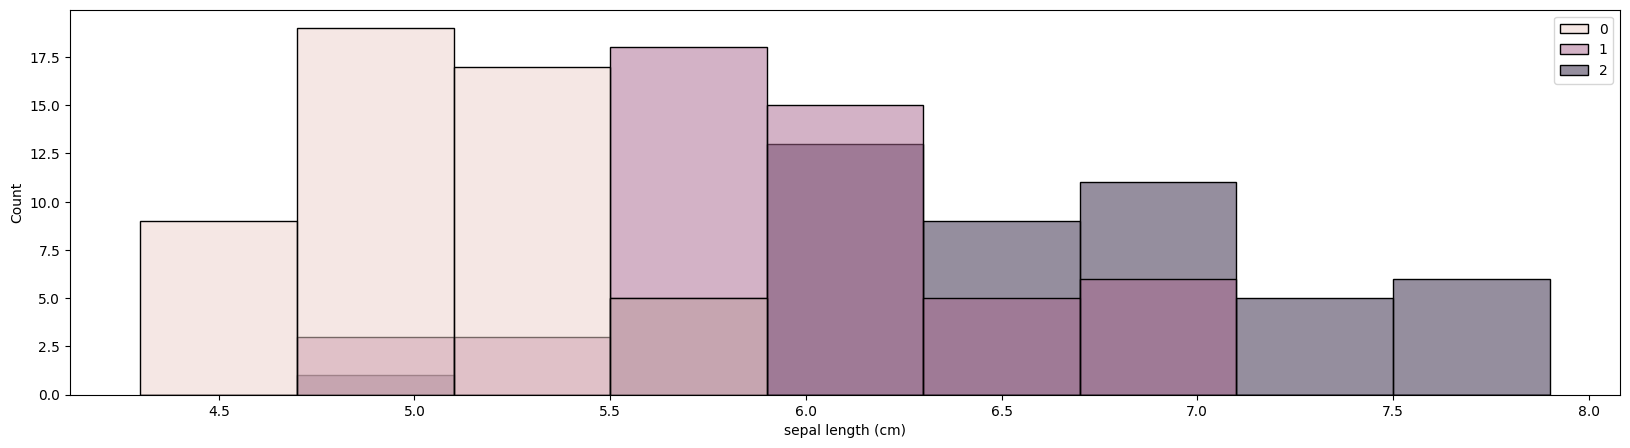

In [11]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=iris.feature_names[0], hue=iris.target)
plt.show()

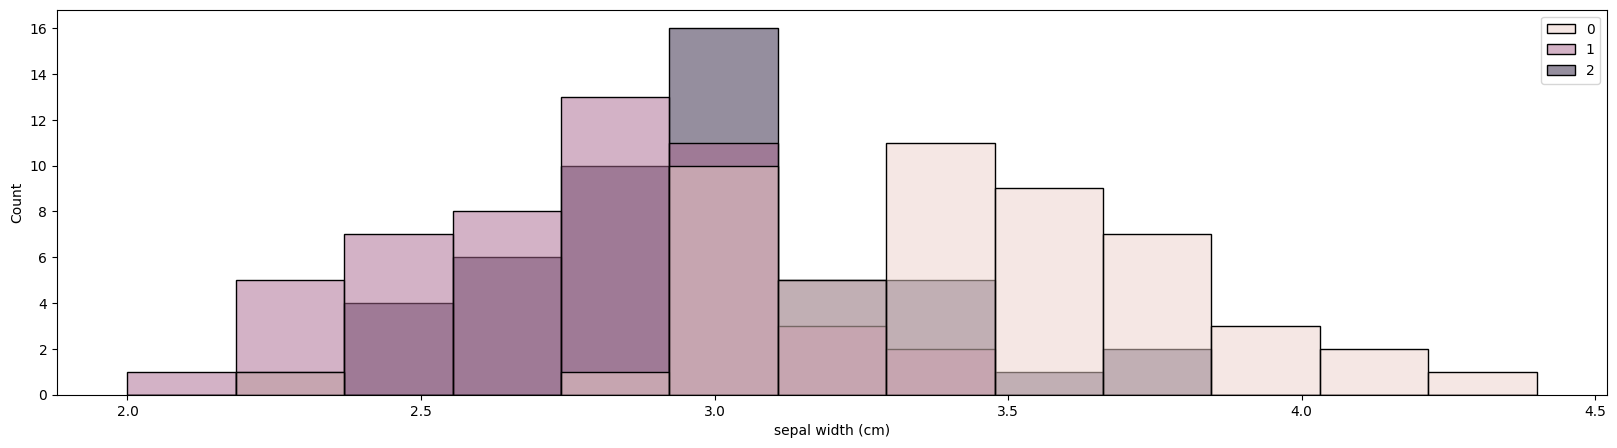

In [12]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=iris.feature_names[1], hue=iris.target)
plt.show()

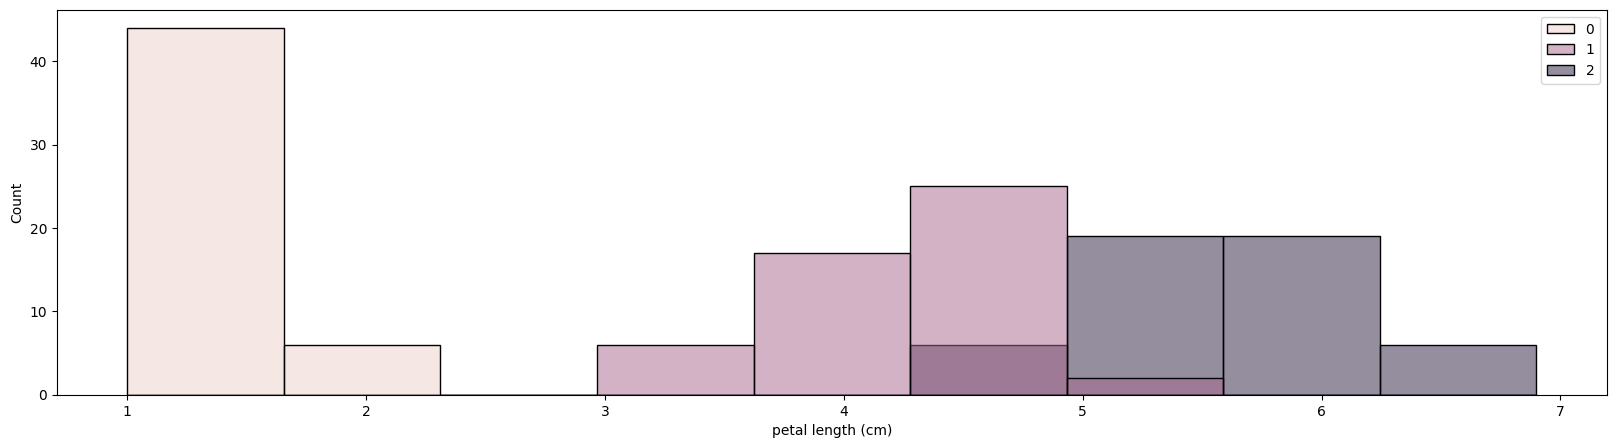

In [13]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=iris.feature_names[2], hue=iris.target)
plt.show()

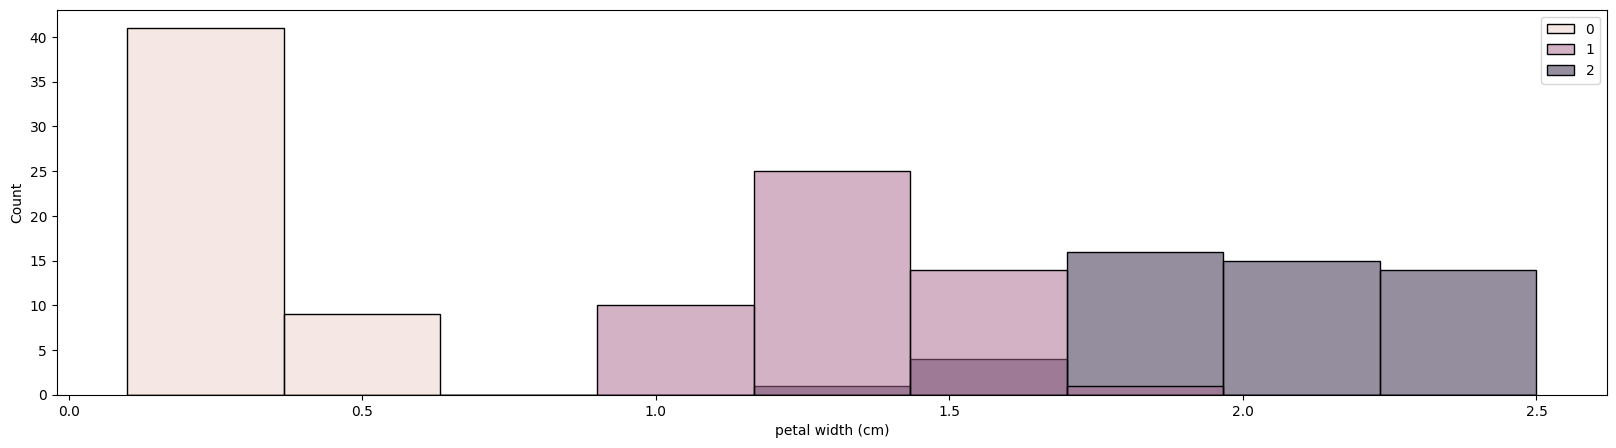

In [14]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=iris.feature_names[3], hue=iris.target)
plt.show()

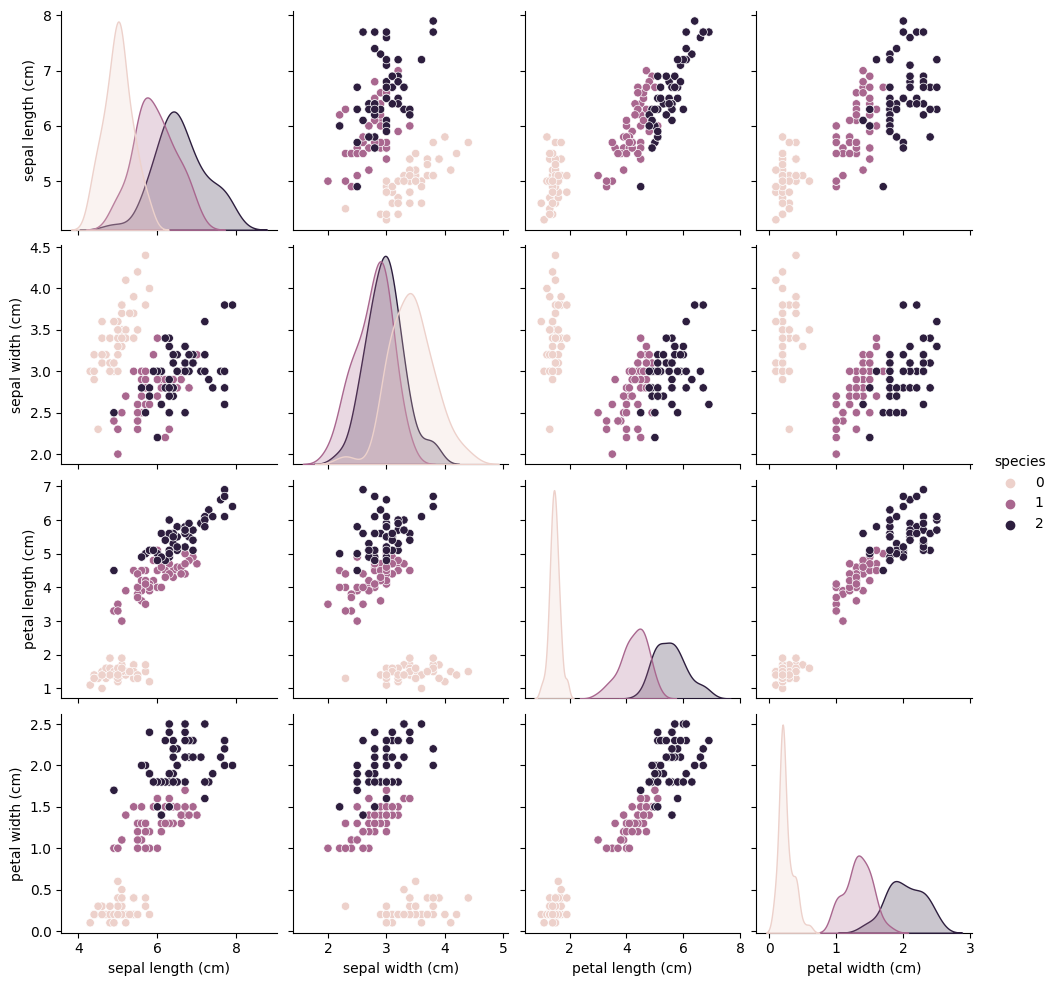

In [15]:
sns.pairplot(data=df, hue="species")
plt.show()

In [16]:
df.corrwith(df.species)

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
species              1.000000
dtype: float64

<Axes: >

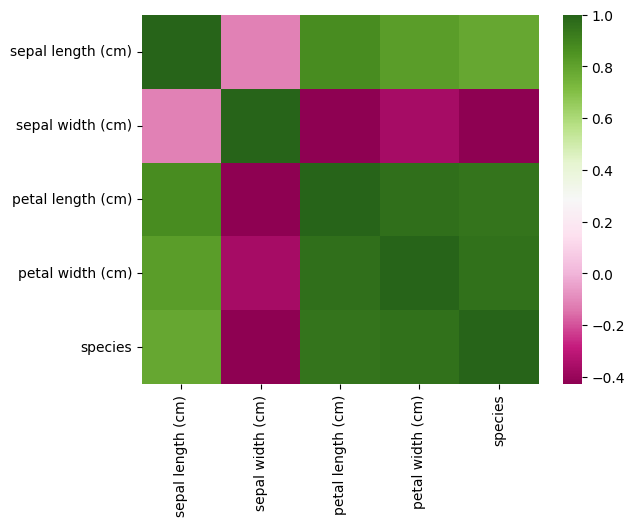

In [17]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr,cmap="PiYG")

#### **Split data into X (features) and y (target)**

In [18]:
X = df.drop('species', axis=1)
y = df['species']

In [19]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### **Split the data into training and testing sets**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Create a pipeline that includes preprocessing and a supervised learning algorithm**

In [21]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

#### **Define the hyperparameters to tune**

In [22]:
params = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': ['scale', 'auto']
}

#### **Use GridSearchCV to find the best hyperparameters**

In [23]:
grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10, 100],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

#### **Print the best hyperparameters and the score of the best model**

In [24]:
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best score:  0.9583333333333334


#### **Use the best model to predict the labels of the test data**

In [25]:
y_pred = grid.predict(X_test)

In [26]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [27]:
Data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
Data.head()

,Real Values,Predicted Values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


#### **Visualize the actual and predicted values**

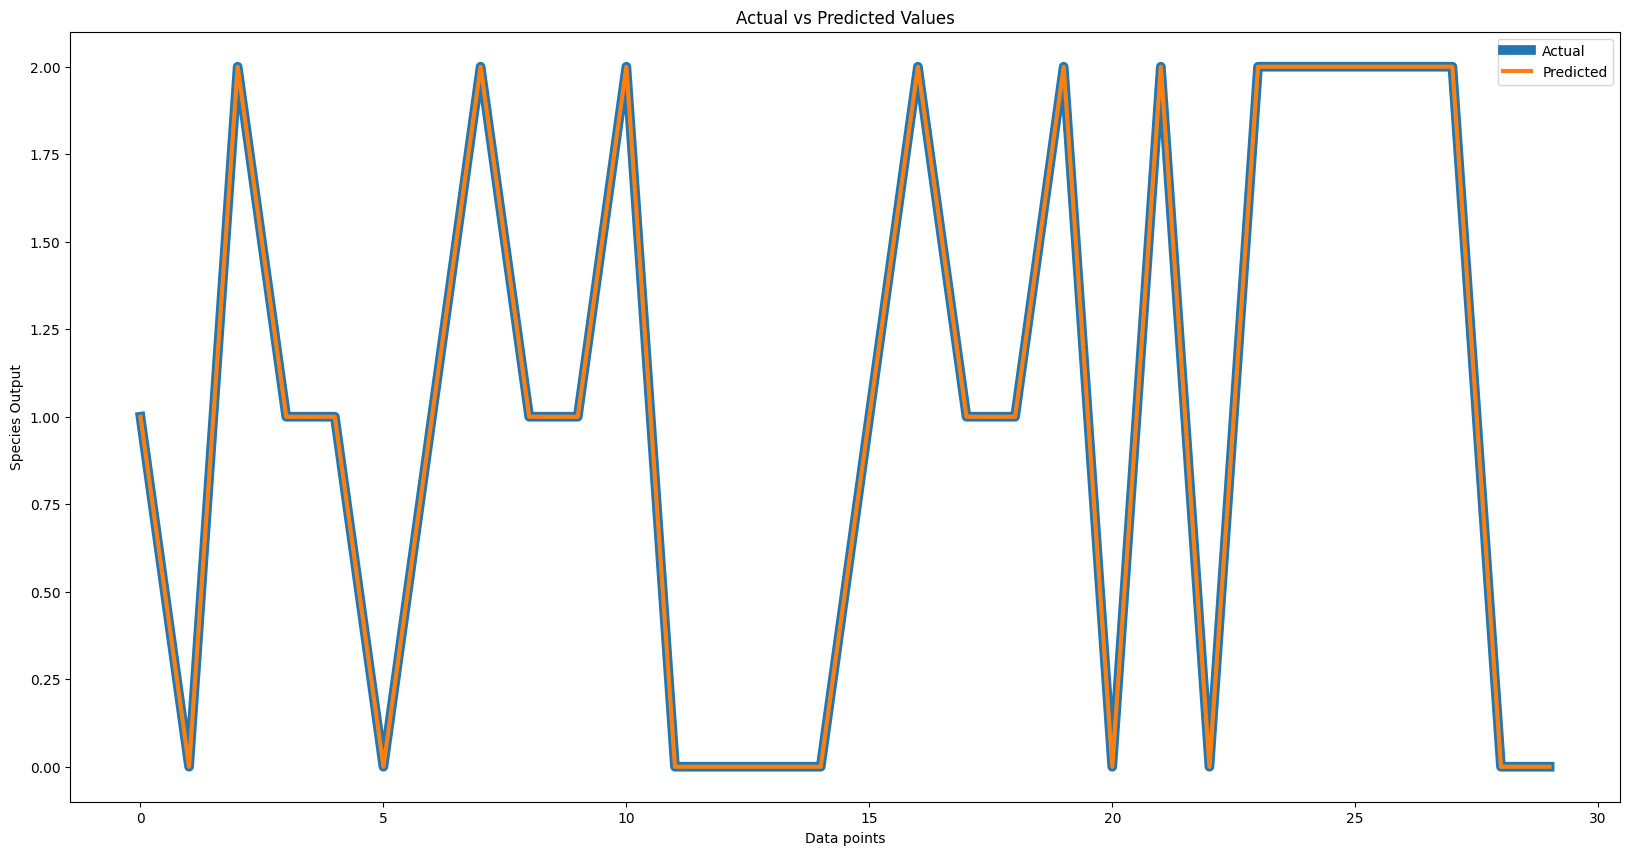

In [28]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label="Actual",linewidth=7)
plt.plot(y_pred, label="Predicted",linewidth=3)
plt.xlabel("Data points")
plt.ylabel("Species Output")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

#### **Evaluate the model performance on the test data**

In [29]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0
